In [2]:
import numpy as np
import matplotlib.pyplot as plt

def formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas):
    nova_carga = ((69/0.10197)*pessoas) + carga
    massa_especifica_arquente = massa_especifica_ar - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((t_ambiente*massa_especifica_ar)/massa_especifica_arquente)
    return diametro, temp_arquente



massa_especifica_ar = 1.227  
t_ambiente = 273 + 15  
carga = 2670    
diametro = 15           
gravidade = 9.81         
pessoas = 0


massa_especifica_arquente, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas);

print("Temperatura do ar quente necessária para decolagem:", temp_arquente -273, "°C")


Temperatura do ar quente necessária para decolagem: 56.3399238745713 °C


+ Gráfico Aumentando Quantidade de Pessoas

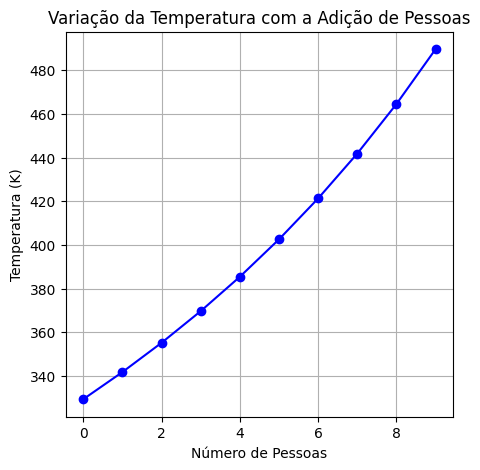

In [8]:

temperatures = []

for i in range(10):
    massa_especifica_arquente, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, i);
    temperatures.append(temp_arquente)
    #print(temp_air, " - ",i)

plt.figure(figsize=(5, 5))
plt.plot(range(10), temperatures, marker='o', color='blue')
plt.xlabel('Número de Pessoas')
plt.ylabel('Temperatura (K)')
plt.title('Variação da Temperatura com a Adição de Pessoas')
plt.grid(True)
plt.show()


+ Gráfico Variando o Tamanho do Balão 

1  -  -0.45185477674922253 k -  -782.0565769876152
2  -  -3.6549793218355764 k -  -96.6834471234519
3  -  -12.718914597994276 k -  -27.78350285139316
4  -  -32.09064921014089 k -  -11.011805890431487
5  -  -70.12446188817091 k -  -5.039268615900922
6  -  -147.2821683315863 k -  -2.399312856424145
7  -  -334.43823783677243 k -  -1.0566255888851754
8  -  -1166.8322300044133 k -  -0.3028507363039359
9  -  2316.658639238699 k -  0.15253693142988323
10  -  796.400542492737 k -  0.4437164230123848
11  -  553.4406796089892 k -  0.6385074553060743
12  -  456.7287383715494 k -  0.773710892946982
13  -  405.95727450869975 k -  0.8704758411526559
14  -  375.3143226428638 k -  0.9415468013893531
15  -  355.1817521299311 k -  0.9949159771888548
16  -  341.17271002900134 k -  1.035768657962008
17  -  331.0099277991074 k -  1.067569188482065
18  -  323.39942302772795 k -  1.0926921164287355
19  -  317.5551235701833 k -  1.1128020736276987
20  -  312.97428897443467 k -  1.129089552876548
21  -  309.32

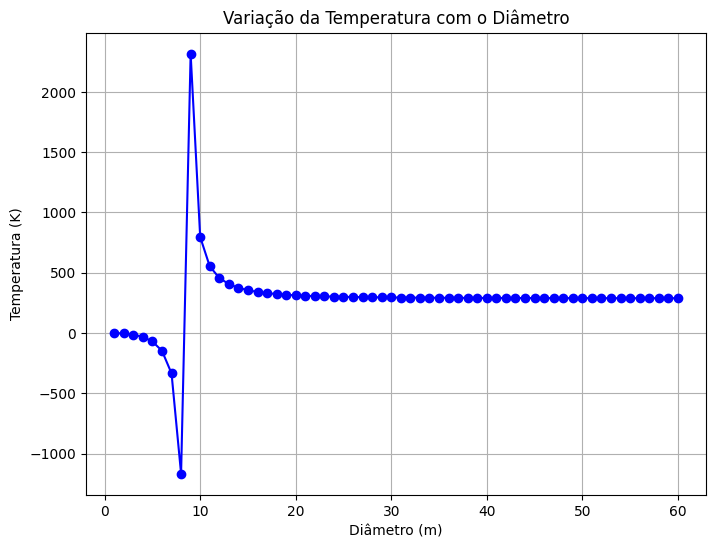

In [13]:
diametros = range(1, 61, 1)
temperatures = []

for d in diametros:
    
    massa_especifica_arquente, temp_arquente = formula_fox(d, carga, t_ambiente, gravidade, massa_especifica_ar, 2);
    temperatures.append(temp_arquente)
    print(d," - ", temp_arquente,"k - ",massa_especifica_arquente)


plt.figure(figsize=(8, 6))
plt.plot(diametros, temperatures, marker='o', color='blue')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Temperatura (K)')
plt.grid(True)
plt.show()


+ Otimização do diametro

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas):
    nova_carga = ((69/0.10197)*pessoas) + carga
    massa_especifica_arquente = massa_especifica_ar - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((t_ambiente*massa_especifica_ar)/massa_especifica_arquente)
    return massa_especifica_arquente, temp_arquente

def custo_total(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas):
    _, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas)
    return 50 * temp_arquente + 200 * diametro

massa_especifica_ar = 1.227  
t_ambiente = 273 + 15  
carga = 2670    
diametro = 15           
gravidade = 9.81         

pessoas = 1
resultado_minimizacao_1 = minimize_scalar(lambda d: custo_total(d, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas), bounds=(0, 100), method='bounded')
diametro_min_1 = resultado_minimizacao_1.x

pessoas = 3
resultado_minimizacao_3 = minimize_scalar(lambda d: custo_total(d, carga, t_ambiente , gravidade, massa_especifica_ar, pessoas), bounds=(0, 100), method='bounded')
diametro_min_3 = resultado_minimizacao_3.x

pessoas = 5
resultado_minimizacao_5 = minimize_scalar(lambda d: custo_total(d, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas), bounds=(0, 100), method='bounded')
diametro_min_5 = resultado_minimizacao_5.x

print("1 pessoa extra no cesto:")
print("Diâmetro do balão que minimiza o Custo Total:", round(diametro_min_1, 4), "metros")

print("\n3 pessoas extras no cesto:")
print("Diâmetro do balão que minimiza o Custo Total:", round(diametro_min_3, 4), "metros")

print("\n5 pessoas extras no cesto:")
print("Diâmetro do balão que minimiza o Custo Total:", round(diametro_min_5, 4), "metros")


1 pessoa extra no cesto:
Diâmetro do balão que minimiza o Custo Total: 19.1419 metros

3 pessoas extras no cesto:
Diâmetro do balão que minimiza o Custo Total: 20.905 metros

5 pessoas extras no cesto:
Diâmetro do balão que minimiza o Custo Total: 22.3271 metros
